# Homework 2
Work done by Hector A. Rodriguez and Siddhanth Lalgowdar

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Questions 1 - 4

1. Download the iris.csv file and load it into a Pandas dataframe
2. Print and display the names of the features
3. Write a function learn(X, y, alpha, max_epochs)
4. Write a function numErrors(X, y, w)


In [7]:
iris_df = pd.read_csv('iris.csv')

In [8]:
df = iris_df.select_dtypes(include = ["int", "float"])
list(df.columns)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'target']

In [86]:
def learn(X, y, alpha, max_epochs, init_w = False):
    w = [0, 0, 0, 0, 0]
    if init_w:
        w = X[0]
        print(w)
    
    for n in range(max_epochs):
        for i in range(len(X)):
            y_hat = np.sign(np.dot(w, X[i].T))
            if y_hat != y[i]:
                w = w + alpha * y[i] * X[i]
        if numErrors(X, y, w) == 0:
            return w, n
            
    return w, n

In [10]:
def numErrors(X, y, w):
    y_hat = np.sign(np.dot(w, X.T))
    error = y == y_hat
    return (len(error) - sum(error)) / len(error)

## Questions 5 - 7
Basic setup of the data by creating a tall vector, converting the y values so they are positive or negative, etc.

In [73]:
iris02_df = iris_df[iris_df['target'] != 1]
iris12_df = iris_df[iris_df['target'] != 0]

In [74]:
y = iris02_df['target'].to_numpy()

y_ = [i - 1 for i in y]

iris02_df_no_y = iris02_df.drop('target', axis = 1)
iris02_df_no_y.insert(0, 'bias', 1)
iris02_df_no_y_arr = iris02_df_no_y.to_numpy()

In [75]:
y12 = iris12_df['target'].to_numpy()

y12_ = []

for i in y12:
    if i == 1:
        y12_.append(-1)
    elif i == 2:
        y12_.append(1)

iris12_df_no_y = iris12_df.drop('target', axis = 1)
iris12_df_no_y.insert(0, 'bias', 1)
iris12_df_no_y_arr = iris12_df_no_y.to_numpy()

## Question 8
8. Test your classifier with the NumPy array created in (6) and (7). Is the data linearly seperable? How many epochs were needed for convergence and how does this depend on the value of alpha? What is the learned vector of weights? What is the error rate? Determine empiracally what value of alpha results in faster convergence

### Iris Setosa vs Iris Virginica
The data is definitely linearly seperable. It needs 2 epochs for convergence, regardless of the alpha value. The learned weights are:

w = [-1. , -2.7, -3.9,  7.8,  4.4]

The error rate is 0.0, and the alpha does not affect how fast this converges. 

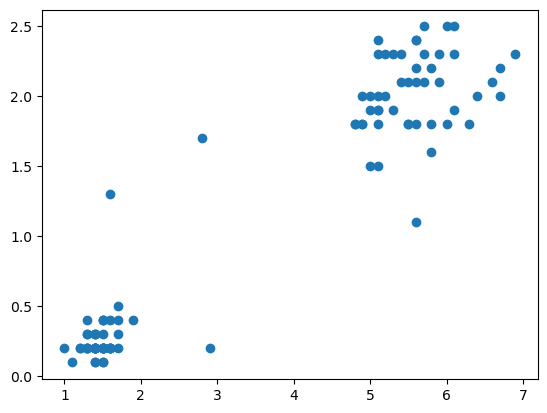

In [21]:
plt.scatter(iris02_df['petal length (cm)'], iris02_df['petal width (cm)'])
plt.show()

In [83]:
max_epochs = [10000]
alpha = [1, 0.1, 0.001, 0.0001, 0.00001]
errors = []
num_epochs = []
weights = []


for epoch in max_epochs:
    for a in alpha:
        w, epochs = learn(iris02_df_no_y_arr, y_, a, epoch)
        num_epochs.append(epochs)
        weights.append(w)
        error = numErrors(iris02_df_no_y_arr, y_, w)
        errors.append(error)

print(errors)
print(num_epochs)
print(weights)

[0.0, 0.0, 0.0, 0.0, 0.0]
[2, 2, 2, 2, 2]
[array([-1. , -2.7, -3.9,  7.8,  4.4]), array([-0.1 , -0.27, -0.39,  0.78,  0.44]), array([-0.001 , -0.0027, -0.0039,  0.0078,  0.0044]), array([-0.0001 , -0.00027, -0.00039,  0.00078,  0.00044]), array([-1.0e-05, -2.7e-05, -3.9e-05,  7.8e-05,  4.4e-05])]


### Iris Versicolor VS Iris Virginica
This dataset is not obviously linearly separable. Regardless of alpha, this set uses the 10000 max epochs everytime. 

The best learned w is [-20.9 ,  -8.24,  -8.92,  11.29,  28.62]

The error rate of this weight is 0.07.

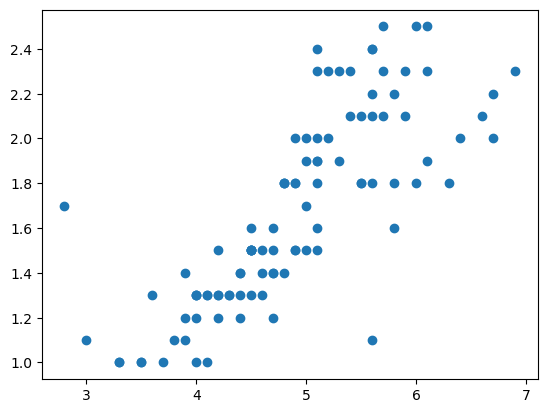

In [22]:
plt.scatter(iris12_df['petal length (cm)'], iris12_df['petal width (cm)'])
plt.show()

In [84]:
max_epochs = [10000]
alpha = [1, 0.1, 0.001, 0.0001, 0.00001]
errors = []
num_epochs = []
weights = []


for epoch in max_epochs:
    for a in alpha:
        w, epochs = learn(iris12_df_no_y_arr, y12_, a, epoch)
        num_epochs.append(epochs)
        weights.append(w)
        error = numErrors(iris12_df_no_y_arr, y12_, w)
        errors.append(error)

print(errors)
print(num_epochs)
print(weights)

[0.17, 0.07, 0.18, 0.2, 0.07]
[9999, 9999, 9999, 9999, 9999]
[array([-207. ,  -76.7,  -87.8,  116.5,  287.5]), array([-20.9 ,  -8.24,  -8.92,  11.29,  28.62]), array([-0.207 , -0.0793, -0.0845,  0.1191,  0.2878]), array([-0.0206 , -0.00769, -0.00875,  0.01177,  0.02876]), array([-0.00209 , -0.000824, -0.000892,  0.001129,  0.002862])]


## Question 9
Change the initialization of the weight

In [90]:
## TO DO
learn(iris12_df_no_y_arr, y12_, 0.01, 1000, init_w=True)

[1.  7.  3.2 4.7 1.4]


(array([-0.53 , -0.747, -1.254,  1.002,  3.161]), 999)

## Questions 10 - 11

In [19]:
corr_matrix = iris02_df.corr()
corr_matrix

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.217326,0.910355,0.847342,0.840970
sepal width (cm),-0.217326,1.000000,-0.473993,-0.449069,-0.545921
petal length (cm),0.910355,-0.473993,1.000000,0.954443,0.971023
petal width (cm),0.847342,-0.449069,0.954443,1.000000,0.965228
target,0.840970,-0.545921,0.971023,0.965228,1.000000


<AxesSubplot:>

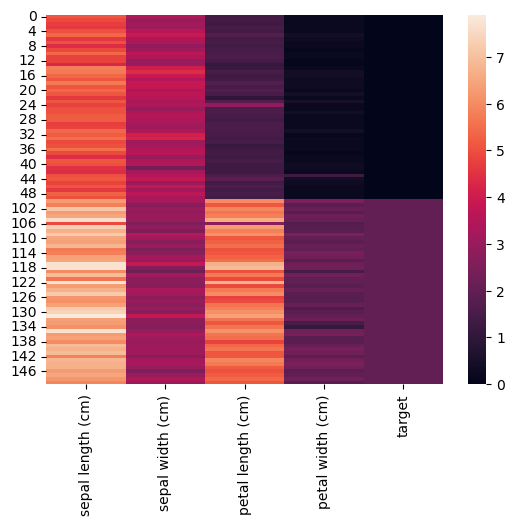

In [91]:
import seaborn as sb

sb.heatmap(iris02_df)

In [20]:
corr_matrix_12 = iris12_df.corr()
corr_matrix_12

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,0.553855,0.845063,0.591253,0.494305
sepal width (cm),0.553855,1.000000,0.526752,0.567999,0.308080
petal length (cm),0.845063,0.526752,1.000000,0.785947,0.742740
petal width (cm),0.591253,0.567999,0.785947,1.000000,0.815239
target,0.494305,0.308080,0.742740,0.815239,1.000000


In [44]:
##TODO: Code to find smallest number of features needed to correctly classify
features = corr_matrix['target']
features = features.drop('target')

minimum = features.min()
minimum

minimum_name = features[features == minimum].index[0]

features = features.drop(minimum_name)
features



sepal length (cm)    0.840970
petal length (cm)    0.971023
petal width (cm)     0.965228
Name: target, dtype: float64

In [71]:
## 1. Keep target corr_coeff that are above threshold
## 2. Compare corr_coeff of remaining, and get rid of 1 of the higher correlated ones

features = corr_matrix_12['target'].drop('target')
y_corcoef_threshold = 0.7
x_corcoef_threshold = 0.9

max_features = features.loc[features >= y_corcoef_threshold]
features_to_keep = []
for i in range(len(max_features) - 1):
    for j in range(i + 1, len(max_features)):
        i_label = max_features[max_features == max_features[i]].index[0]
        j_label = max_features[max_features == max_features[j]].index[0]
        
        corr = corr_matrix[i_label][j_label]
        
        if (corr >= x_corcoef_threshold and i_label not in features_to_keep and i_label not in features_to_remove):
            features_to_keep.append(i_label)
        
        print(f'{i_label} and {j_label}:  {corr}')

print(f'Features to Keep: {features_to_keep}')

petal length (cm) and petal width (cm):  0.9544432899373511
Features to Keep: ['petal length (cm)']


In [72]:
## 1. Keep target corr_coeff that are above threshold
## 2. Compare corr_coeff of remaining, and get rid of 1 of the higher correlated ones

features = corr_matrix['target'].drop('target')
y_corcoef_threshold = 0.7
x_corcoef_threshold = 0.9

max_features = features.loc[features >= y_corcoef_threshold]
features_to_keep = []
for i in range(len(max_features) - 1):
    for j in range(i + 1, len(max_features)):
        i_label = max_features[max_features == max_features[i]].index[0]
        j_label = max_features[max_features == max_features[j]].index[0]
        
        corr = corr_matrix[i_label][j_label]
        
        if (corr >= x_corcoef_threshold and i_label not in features_to_keep and i_label not in features_to_remove):
            features_to_keep.append(i_label)
        
        print(f'{i_label} and {j_label}:  {corr}')

print(f'Features to Keep: {features_to_keep}')

sepal length (cm) and petal length (cm):  0.910354588861289
sepal length (cm) and petal width (cm):  0.8473420822043584
petal length (cm) and petal width (cm):  0.9544432899373511
Features to Keep: ['sepal length (cm)', 'petal length (cm)']
